# Project: Cotton Plant Disease Prediction &amp; Get Cure AI App - IAIP

In [1]:
# import libraries

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint

# train and validation data_path

In [2]:
train_data_path = "datasets//train"
validation_data_path = "datasets//val"


# Plot Image 

In [3]:


def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20, 20))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
    plt.tight_layout()
    plt.show()

# Generate Augumented Image for proper training of model

Found 1951 images belonging to 4 classes.
Found 324 images belonging to 4 classes.


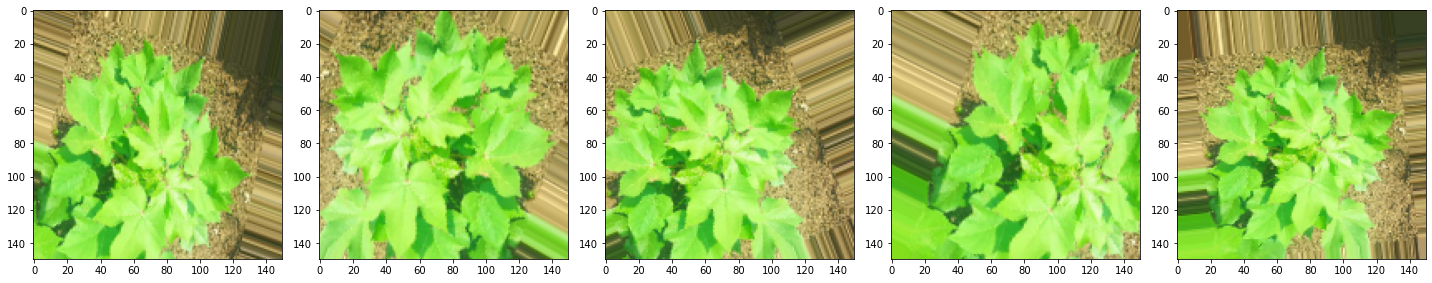

In [4]:
# this is the augmentation configuration we will use for training
# It generate more images using below parameters
training_datagen = ImageDataGenerator(rescale=1./255,
                                      rotation_range=40,
                                      width_shift_range=0.2,
                                      height_shift_range=0.2,
                                      shear_range=0.2,
                                      zoom_range=0.2,
                                      horizontal_flip=True,
                                      fill_mode='nearest')
 
# this is a generator that will read pictures found in
# at train_data_path, and indefinitely generate
# batches of augmented image data
training_data = training_datagen.flow_from_directory(train_data_path, # this is the target directory
                                      target_size=(150, 150), # all images will be resized to 150x150
                                      batch_size=32,
                                      class_mode='binary')  # since we use binary_crossentropy loss, we need binary labels
 
training_data.class_indices
 
 
 
# this is the augmentation configuration we will use for validation:
# only rescaling
valid_datagen = ImageDataGenerator(rescale=1./255)
 
# this is a similar generator, for validation data
valid_data = valid_datagen.flow_from_directory(validation_data_path,
                                  target_size=(150,150),
                                  batch_size=32,
                                  class_mode='binary')
 
images = [training_data[0][0][0] for i in range(5)]
plotImages(images)
 

# Creating CheckPoint 

In [5]:
model_path = 'model_cott_dis_pred1.h5'
checkpoint = ModelCheckpoint(model_path, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]
 

# Building CNN Model

In [6]:
#Building cnn model
cnn_model = keras.models.Sequential([
                                    keras.layers.Conv2D(filters=32, kernel_size=3, input_shape=[150, 150, 3]),
                                    keras.layers.MaxPooling2D(pool_size=(2,2)),
                                    keras.layers.Conv2D(filters=64, kernel_size=3),
                                    keras.layers.MaxPooling2D(pool_size=(2,2)),
                                    keras.layers.Conv2D(filters=128, kernel_size=3),
                                    keras.layers.MaxPooling2D(pool_size=(2,2)),                                    
                                    keras.layers.Conv2D(filters=256, kernel_size=3),
                                    keras.layers.MaxPooling2D(pool_size=(2,2)),
 
                                    keras.layers.Dropout(0.5),                                                                        
                                    keras.layers.Flatten(),
                                    keras.layers.Dense(units=128, activation='relu'), 
                                    keras.layers.Dropout(0.1),                                    
                                    keras.layers.Dense(units=256, activation='relu'),                                    
                                    keras.layers.Dropout(0.25),                                    
                                    keras.layers.Dense(units=4, activation='softmax')
])
 
 

# Compile CNN Model

In [7]:
cnn_model.compile(optimizer = Adam(lr=0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])


# Train CNN Model

In [ ]:
 # train cnn model
history = cnn_model.fit(training_data, 
                          epochs=100, 
                          verbose=1, 
                          validation_data= valid_data,
                          callbacks=callbacks_list) 
 


Epoch 1/100
61/61 [==============================] - 75s 1s/step - loss: 0.9249 - accuracy: 0.6253 - val_loss: 0.8676 - val_accuracy: 0.6080

Epoch 00001: val_accuracy improved from 0.57716 to 0.60802, saving model to model_cott_dis_pred1.h5
Epoch 2/100
61/61 [==============================] - 78s 1s/step - loss: 0.8740 - accuracy: 0.6402 - val_loss: 0.7201 - val_accuracy: 0.7006

Epoch 00002: val_accuracy improved from 0.60802 to 0.70062, saving model to model_cott_dis_pred1.h5
Epoch 3/100
61/61 [==============================] - 82s 1s/step - loss: 0.8458 - accuracy: 0.6515 - val_loss: 0.6737 - val_accuracy: 0.7130

Epoch 00003: val_accuracy improved from 0.70062 to 0.71296, saving model to model_cott_dis_pred1.h5
Epoch 4/100
61/61 [==============================] - 80s 1s/step - loss: 0.8169 - accuracy: 0.6817 - val_loss: 0.8030 - val_accuracy: 0.6574

Epoch 00004: val_accuracy did not improve from 0.71296
Epoch 5/100
61/61 [==============================] - 84s 1s/step - loss: 0.78

61/61 [==============================] - 57s 940ms/step - loss: 0.3727 - accuracy: 0.8601 - val_loss: 0.2857 - val_accuracy: 0.8920

Epoch 00040: val_accuracy did not improve from 0.90123
Epoch 41/100
61/61 [==============================] - 52s 853ms/step - loss: 0.3236 - accuracy: 0.8836 - val_loss: 0.2886 - val_accuracy: 0.8951

Epoch 00041: val_accuracy did not improve from 0.90123
Epoch 42/100
61/61 [==============================] - 58s 948ms/step - loss: 0.3591 - accuracy: 0.8631 - val_loss: 0.2504 - val_accuracy: 0.8951

Epoch 00042: val_accuracy did not improve from 0.90123
Epoch 43/100
61/61 [==============================] - 62s 1s/step - loss: 0.3451 - accuracy: 0.8734 - val_loss: 0.3686 - val_accuracy: 0.8457

Epoch 00043: val_accuracy did not improve from 0.90123
Epoch 44/100
61/61 [==============================] - 60s 983ms/step - loss: 0.3570 - accuracy: 0.8642 - val_loss: 0.2357 - val_accuracy: 0.9167

Epoch 00044: val_accuracy improved from 0.90123 to 0.91667, saving

61/61 [==============================] - 53s 865ms/step - loss: 0.2587 - accuracy: 0.9052 - val_loss: 0.1626 - val_accuracy: 0.9506

Epoch 00080: val_accuracy did not improve from 0.95679
Epoch 81/100
61/61 [==============================] - 51s 835ms/step - loss: 0.2381 - accuracy: 0.9180 - val_loss: 0.1207 - val_accuracy: 0.9630

Epoch 00081: val_accuracy improved from 0.95679 to 0.96296, saving model to model_cott_dis_pred1.h5
Epoch 82/100
61/61 [==============================] - 59s 963ms/step - loss: 0.2259 - accuracy: 0.9144 - val_loss: 0.1281 - val_accuracy: 0.9630

Epoch 00082: val_accuracy did not improve from 0.96296
Epoch 83/100
61/61 [==============================] - 54s 884ms/step - loss: 0.2606 - accuracy: 0.9088 - val_loss: 0.1123 - val_accuracy: 0.9691

Epoch 00083: val_accuracy improved from 0.96296 to 0.96914, saving model to model_cott_dis_pred1.h5
Epoch 84/100
61/61 [==============================] - 61s 982ms/step - loss: 0.2296 - accuracy: 0.9159 - val_loss: 0.13

In [ ]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
 
history.history